In [1]:
# import libraries
import numpy as np
import plotly.express as px
import networkx as nx
from networkx.algorithms.clique import find_cliques, enumerate_all_cliques
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from networkx.drawing.nx_pylab import draw_kamada_kawai
import warnings
from networkx.algorithms.components import number_connected_components
from itertools import combinations, chain

In [2]:
# import IH classes
from gdeep.intersection_homology import IntersectionHomology, compute_coarsest_strata


# Intersection homology 

This notebooks shows how to use compoute intersection homology for a given perversity. The perversity can be user-defined. We have two approaches to finding a suitable stratification:

1. Use the coarsest possible stratification
2. Use the singularity loci stratification as if being defined in the continuous setting (default)

# Perversities
Let $X$ be a stratified space with strata $X_d$.

An i-simplex $\sigma$ in $K$ is said to be $p$-proper if the following condition holds for all $k = 0,...,d$:

$$dim(\bar\sigma  \cap X_{d−k}) \leq i − k + p(k)$$

where $\bar \sigma$ denotes the closure of the open simplex $\sigma$, and $p:\{0,1,...,n\}\to \{0,1,...,n\}$ is a perversisty. Notice that a perversity satisfies $p(k+1)=p(k)$ or $p(k)+1$

# Coarsest Stratification
$B_\sigma := St(\sigma) = \{\tau \in K | \sigma \leq \tau\}$. Using the partial order induced by inclusions of minimal open neighborhoods, we set $\tau \leq \sigma$ if $B_\sigma \subset B_\tau$ 

### Algorithm
1. Set $i=0$, $d_0 =dim X$, $X_{d_0} = X$,and initialize $S_j = \varnothing$,forall $0\leq j\leq d_0$. 
2. While $d_i \geq 0$, do

   (a) For each $x\in X_{d_i}$,set $S_{d_i} = S_{d_i} \cup x$ if $\delta(w\leq y)=1$,$\forall$ adjacent pairs $w\leq y$ in $B_x \cap X_{d_i}$ 
   
   (b) Set $d_{i+1} = dim(X_{d_i} − S_{d_i} )$
   
   (c) Define $X_{d_{i+1}} = X_{d_i} − S_{d_i}$ 
   
   (d) Set $i=i+1$
   
3. Return $S$

# Computing standard homology of clique complex

[(0, [[0]]), (1, [[6, 10]]), (1, [[6, 13]]), (1, [[8, 11]]), (1, [[9, 11]])]


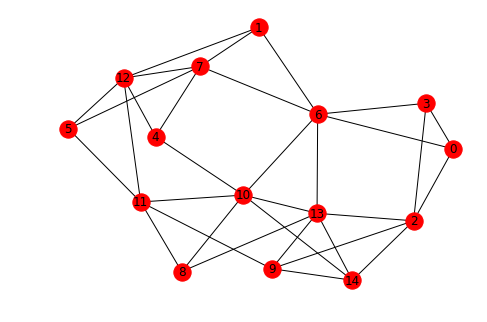

In [3]:
# random point cloud
X = np.random.random((15,3))
# we will build the knn graph with knn=3 and compute the homology of th clique complex
ih = IntersectionHomology(knn=3, perversity_check=False)

#ih.fit(X)
#print(ih.simplices)
homology = ih.fit_transform(X)
print(homology)
ih.plot()


# Computing intersection homology with top perversty

[(0, [[4]])]


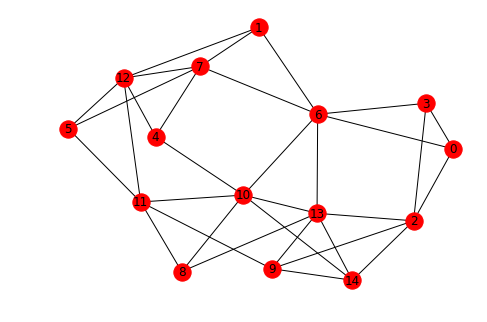

In [4]:

# we will build the knn graph with knn=3 and compute the homology of th clique complex
ih = IntersectionHomology(knn=3)

#ih.fit(X)
#print(ih.simplices)
homology = ih.fit_transform(X)
print(homology)
ih.plot()

# Computing with dual perversity

[(0, [[4]])]


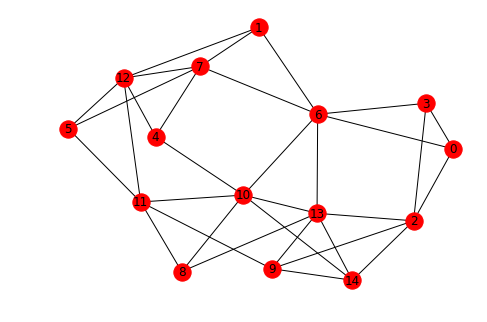

In [5]:
ih2 = IntersectionHomology(knn=3,perversity=IntersectionHomology.q)

#ih.fit(X)
#print(ih.simplices)
homology = ih2.fit_transform(X)
print(homology)
ih2.plot()

Simplices:  [[0], [1], [2], [3], [4], [5], [6], [0, 1], [0, 3], [0, 4], [0, 5], [1, 2], [2, 3], [4, 6], [5, 6]]


[(0, [[0]]),
 (1, [[0, 1], [0, 3], [1, 2], [2, 3]]),
 (1, [[0, 4], [0, 5], [4, 6], [5, 6]])]

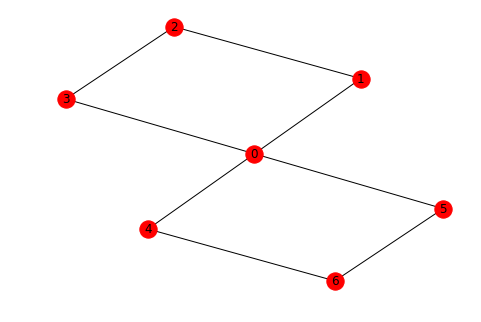

In [6]:
# build a graph from edges: a bouquet of 2 circles
G = nx.Graph()
edges = [(0,1),(1, 2), (0, 3),(2,3),(0,4),(0,5),(4,6),(5,6)]
G.add_edges_from(edges)
ih = IntersectionHomology()
homology = ih.fit_transform(G)
print("Simplices: ",ih.simplices)
ih.plot()
homology

[(0, [[1]]), (0, [[4]]), (2, [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]), (2, [[0, 4, 5], [0, 4, 6], [0, 5, 6], [4, 5, 6]])]
dual perversity: 
[(0, [[1]]), (0, [[4]]), (2, [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]), (2, [[0, 4, 5], [0, 4, 6], [0, 5, 6], [4, 5, 6]])]


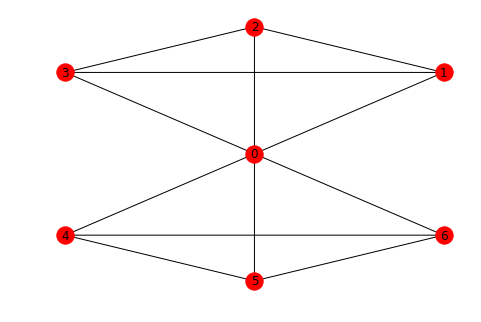

In [7]:
# 2 2-spheres
G = nx.Graph()
edges = [(0,1),(1, 2), (0, 3),(2,3),(0,4),(0,5),(4,6),(5,6),(1,3),(0,2),(0,6),(4,5)]
G.add_edges_from(edges)

ih = IntersectionHomology()
ih.fit(G)
# we remove the tetrahedra from the proper simplices, as we are interestd in checking if
# we are able to find duality between H0 and H2
lst = ih.list_proper[:-2]
homology = ih.transform(G,lst)
print(homology)

print("dual perversity: ")
ih2 = IntersectionHomology(perversity=IntersectionHomology.q)
ih2.fit(G)
# removing 2 tetrehedra (which happen to be the last simplices in the list_proper)
lst2 = ih.list_proper[:-2]
homology2 = ih2.transform(G,lst2)
ih2.plot()
print(homology2)


[(0, [[1]]),
 (0, [[5]]),
 (3, [[0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 3, 4]]),
 (3, [[9, 5, 6, 7], [9, 5, 6, 8], [9, 5, 7, 8], [9, 6, 7, 8], [5, 6, 7, 8]])]

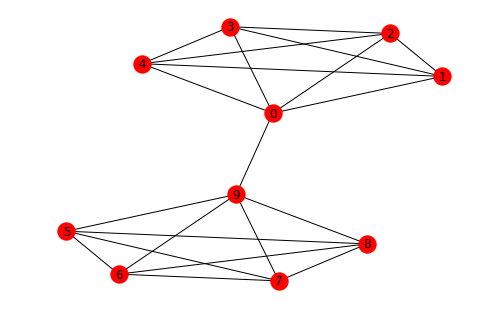

In [8]:
# 2 3-spheres
G = nx.Graph()
edges = [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),#sphere 1
         (0,9),
         (9,5),(9,6),(9,7),(9,8),(5,6),(5,7),(5,8),(6,7),(6,8),(7,8)]# sphere 2
G.add_edges_from(edges)

ih = IntersectionHomology()
ih.fit(G)
# remove the hyper-tetrahedra
lst = ih.list_proper[:-2]
homology = ih.transform(G,lst)
ih.plot()
homology



[(0, [[0]]),
 (0, [[4]]),
 (0, [[8]]),
 (1, [[0, 1], [0, 3], [1, 2], [2, 3]]),
 (1, [[4, 5], [4, 7], [5, 6], [6, 7]]),
 (1, [[8, 9], [8, 11], [9, 10], [10, 11]])]

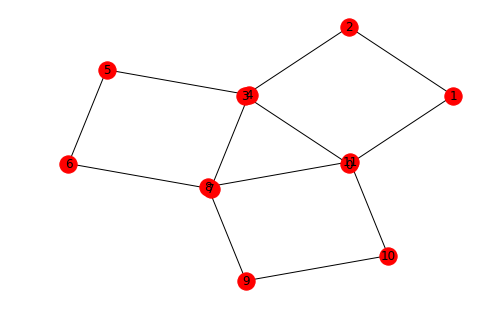

In [9]:
# cross check: 3 disconnected circles
G = nx.Graph()
edges = [(0,1),(1, 2), (2, 3),(3,0),(4,5),(5,6),(6,7),(7,4),(8,9),(9,10),(10,11),(11,8)]
G.add_edges_from(edges)

ih = IntersectionHomology()
homology = ih.fit_transform(G)
ih.plot()
homology



Homology groups representatives


[(0, [[0]]),
 (2,
  [[0, 1, 5],
   [0, 1, 12],
   [0, 3, 4],
   [0, 3, 12],
   [0, 4, 5],
   [1, 2, 6],
   [1, 2, 12],
   [1, 5, 6],
   [2, 3, 7],
   [2, 3, 12],
   [2, 6, 7],
   [3, 4, 7],
   [4, 5, 9],
   [4, 7, 8],
   [4, 8, 9],
   [5, 6, 10],
   [5, 9, 10],
   [6, 7, 11],
   [6, 10, 11],
   [7, 8, 11],
   [8, 9, 12],
   [8, 11, 12],
   [9, 10, 12],
   [10, 11, 12]])]

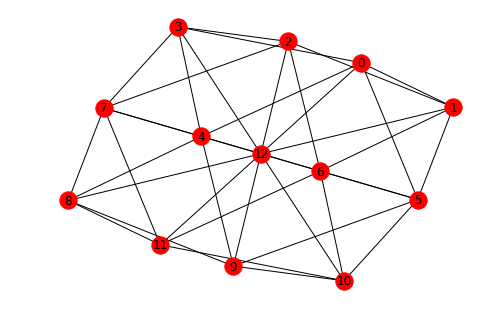

In [10]:
# pinched torus
G = nx.Graph()
edges = [(0,1),(1, 2), (2, 3),(3,0),(4,5),(5,6),(6,7),(7,4),(8,9),(9,10),(10,11),(11,8),# 3 loops with 4 vertices each
         (0,12),(1,12),(2,12),(3,12),(8,12),(9,12),(10,12),(11,12),# singular point
         (0,4),(1,5),(2,6),(3,7),(4,8),(5,9),(6,10),(7,11), #straight connections
         (0,5),(1,6),(2,7),(3,4),(4,9),(5,10),(6,11),(7,8)] # oblique conections
G.add_edges_from(edges)

ih = IntersectionHomology()
homology = ih.fit_transform(G)
ih.plot()
print("Homology groups representatives")
homology
